In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 

## Data Preprocess

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=["id","date"] , inplace=True)

In [9]:

features= df.loc[:, ~(df.columns.unique().isin(["price"]))]
target = df.loc[:,["price"]]

### OLS

In [10]:
import statsmodels.regression.linear_model as reg
import statsmodels.api as sm

model = reg.OLS(target , features ,hasconst=bool).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:11   Log-Likelihood:            -2.9461e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.551e+04   1888.716    -18.802      0.000   -3.92e+04   -3.18e+04
bathrooms      4.105e+04   3253.759     12.618      0.000    3.47e+04    4.74e+04
sqft_living     110.2642      2.268     48.607      0.000     105.818     114.711
sqft_lot          0.1334      0.048      2.786      0.005       0.040       0.227
floors         5261.5471   3541.347      1.486      0.137   -1679.755    1.22e+04
waterfront     5.833e+05   1.74e+04     33.598      0.000    5.49e+05    6.17e+05
view           5.236e+04   2128.298     24.600      0.000    4.82e+04    5.65e+04
condition      2.721e+04   2323.818     11.709      0.000    2.27e+04    3.18e+04
grade          9.548e+04   2145.492     44.503      0.000    9.13e+04    9.97e+04
sqft_above       71.3928      2.238     31.902      0.000      67.006      75.779
sqft_basement    38.8714      2.624     14.813      0.000      33.728      44.015
yr_built      -2561.7953     68.006    -37.670      0.000   -2695.092   -2428.498
yr_renovated     20.4187      3.646      5.600      0.000      13.272      27.566
zipcode        -519.0756     17.826    -29.119      0.000    -554.016    -484.136
lat            6.022e+05   1.07e+04     56.106      0.000    5.81e+05    6.23e+05
long          -2.179e+05   1.31e+04    -16.683      0.000   -2.44e+05   -1.92e+05
sqft_living15    23.0994      3.392      6.811      0.000      16.452      29.747
sqft_lot15       -0.3761      0.073     -5.137      0.000      -0.520      -0.233
==============================================================================
Omnibus:                    18403.146   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873534.498
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      48.049   Cond. No.                     2.99e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

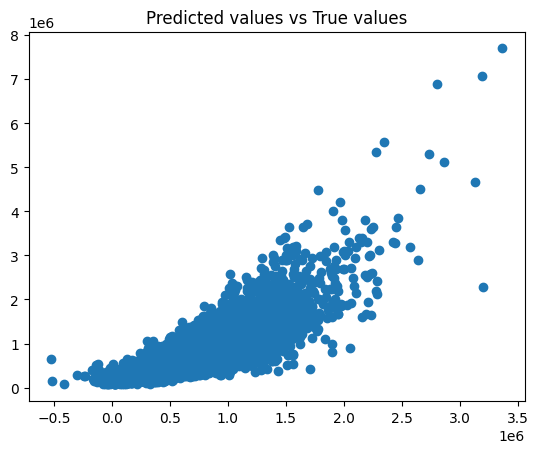

In [11]:

plt.title("Predicted values vs True values")
plt.scatter(model.predict(features) , target)

## WLS

In [12]:

from statsmodels.tools.eval_measures import mse 

mse_val = mse(target, model.predict(features))

w_model = sm.WLS(target,features , weights = 1./(mse_val**2)).fit()

w_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            WLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          1.908e+04
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:58:49   Log-Likelihood:                     -2.8806e+05
No. Observations:               21613   AIC:                                  5.761e+05
Df Residuals:                   21596   BIC:                                  5.763e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.462e+04   1327.170    -11.014      0.000   -1.72e+04    -1.2e+04
bathrooms      2.716e+04   2232.805     12.165      0.000    2.28e+04    3.15e+04
sqft_living      59.7264      1.717     34.789      0.000      56.361      63.092
sqft_lot          0.2791      0.037      7.556      0.000       0.207       0.352
floors         3.303e+04   2317.376     14.251      0.000    2.85e+04    3.76e+04
waterfront      2.33e+05   4.36e+04      5.349      0.000    1.48e+05    3.18e+05
view           3.744e+04   1722.358     21.736      0.000    3.41e+04    4.08e+04
condition        2.5e+04   1532.958     16.310      0.000     2.2e+04     2.8e+04
grade          8.802e+04   1533.423     57.401      0.000     8.5e+04     9.1e+04
sqft_above       31.5346      1.647     19.151      0.000      28.307      34.762
sqft_basement    28.1918      1.844     15.287      0.000      24.577      31.807
yr_built      -2186.8270     46.344    -47.187      0.000   -2277.665   -2095.989
yr_renovated     13.4918      2.536      5.320      0.000       8.521      18.462
zipcode        -402.1498     12.352    -32.558      0.000    -426.361    -377.939
lat            6.151e+05   7155.533     85.959      0.000    6.01e+05    6.29e+05
long          -1.136e+05   9004.557    -12.618      0.000   -1.31e+05    -9.6e+04
sqft_living15    51.8742      2.475     20.960      0.000      47.023      56.725
sqft_lot15       -0.2064      0.055     -3.755      0.000      -0.314      -0.099
==============================================================================
Omnibus:                     4056.735   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15075.000
Skew:                           0.912   Prob(JB):                         0.00
Kurtosis:                       6.662   Cond. No.                     1.81e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.2e-43. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

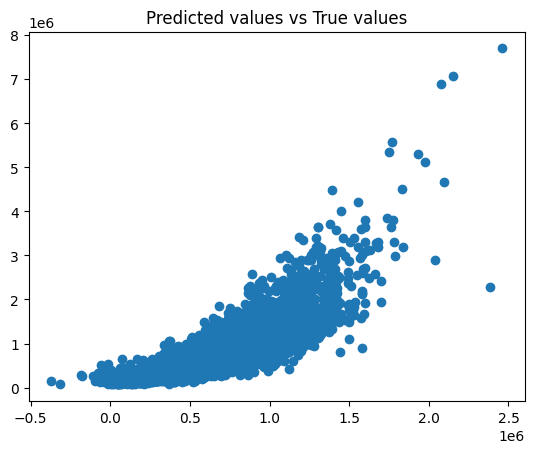

In [13]:
plt.title("Predicted values vs True values")
plt.scatter(w_model.predict(features) , target )

## SUMMARY

In [14]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

mae_model = mae(target, model.predict(features))
mae_w_model = mae(target, w_model.predict(features))

mape_model = mape(target, model.predict(features))
mape_w_model = mape(target, w_model.predict(features))

print("OlS MAE: ",mae_model)
print("OlS MAPE: ",mape_model)
print("==================")
print("WLS MAE: ",mae_w_model)
print("WLS MAPE: ",mape_w_model)


OlS MAE:  125881.5718112254
OlS MAPE:  0.25561092052451
WLS MAE:  118120.09129246318
WLS MAPE:  0.21997946214696784
